In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv(
    "globalterrorismdb_0718dist.csv",
    encoding="latin1",
    low_memory=False
)

print("Dataset loaded successfully.")
display(df.head())
df.info()



Dataset loaded successfully.


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
N = len(df)
print(f"Sample Space Size (N): {N}")


Sample Space Size (N): 181691


In [ ]:
A1 = df['nkill'] > 0
B1 = df['nkill'] >= 5
C1 = df['nkill'] == 0


In [ ]:
A2 = (df['nkill'].fillna(0) + df['nwound'].fillna(0)) > 0
B2 = df['success'] == 1
C2 = df['property'] > 0


In [ ]:
median_injury = df.loc[df['nwound'] > 0, 'nwound'].median()

A3 = df['nwound'] > 0
B3 = df['nwound'] >= median_injury
C3 = df['nwound'] == 0


In [ ]:
A4 = df['extended'] == 1
B4 = df['nkill'] > 0
C4 = (df['nkill'] > 0) & (df['nwound'] > 0)


In [ ]:
A5 = df['property'] > 0
B5 = df['nkill'] > 0
C5 = df['nwound'] > 0


In [ ]:
def event_probabilities(events, labels):
    probs = [event.mean() for event in events]
    return pd.DataFrame({
        "Event": labels,
        "Probability": probs
    })


,Event,Probability
0,Fatal Attack,0.458080
1,Multiple Fatalities,0.109015
2,No Fatalities,0.485159


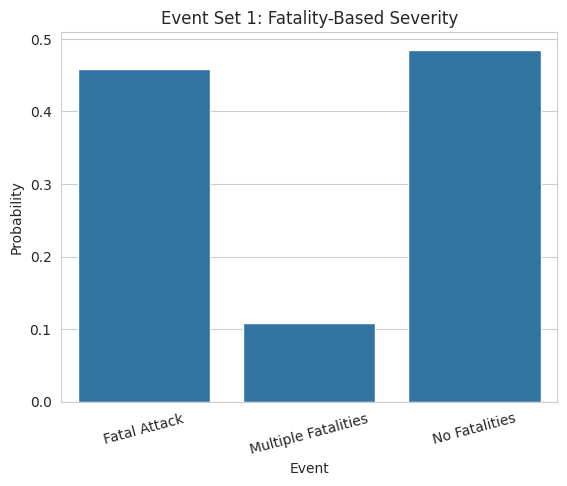

In [ ]:
df_set1 = event_probabilities(
    [A1, B1, C1],
    ["Fatal Attack", "Multiple Fatalities", "No Fatalities"]
)

display(df_set1)

sns.barplot(x="Event", y="Probability", data=df_set1)
plt.title("Event Set 1: Fatality-Based Severity")
plt.xticks(rotation=15)
plt.show()


,Event,Probability
0,Any Casualty,0.593265
1,Successful Attack,0.889598
2,Property Damage,0.514792


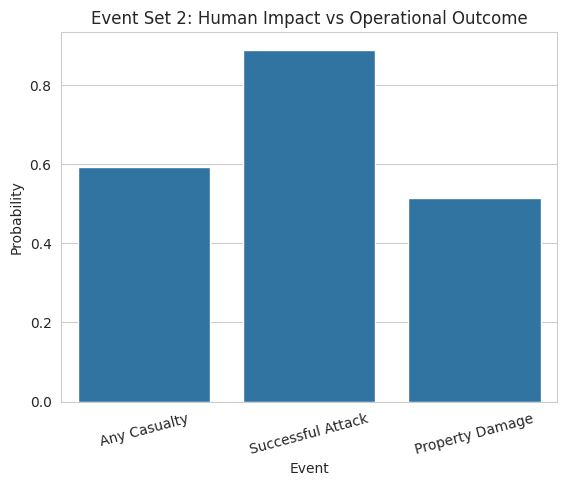

In [ ]:
df_set2 = event_probabilities(
    [A2, B2, C2],
    ["Any Casualty", "Successful Attack", "Property Damage"]
)

display(df_set2)

sns.barplot(x="Event", y="Probability", data=df_set2)
plt.title("Event Set 2: Human Impact vs Operational Outcome")
plt.xticks(rotation=15)
plt.show()


,Event,Probability
0,Any Injury,0.341817
1,High Injury (≥ Median),0.197330
2,No Injury,0.568410


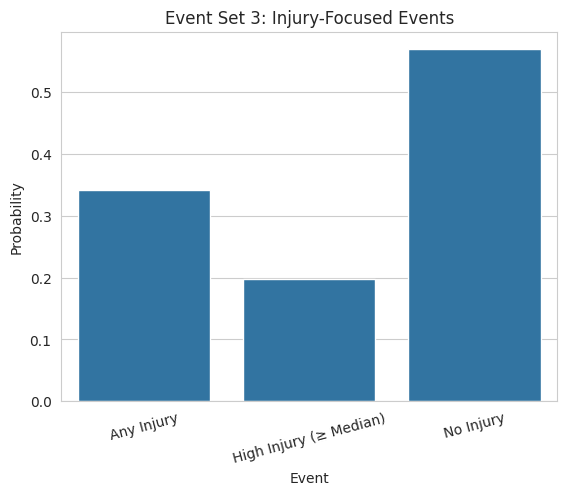

In [ ]:
df_set3 = event_probabilities(
    [A3, B3, C3],
    ["Any Injury", "High Injury (≥ Median)", "No Injury"]
)

display(df_set3)

sns.barplot(x="Event", y="Probability", data=df_set3)
plt.title("Event Set 3: Injury-Focused Events")
plt.xticks(rotation=15)
plt.show()


,Event,Probability
0,Extended Attack,0.045346
1,Fatal Attack,0.458080
2,Fatal + Injury,0.206631


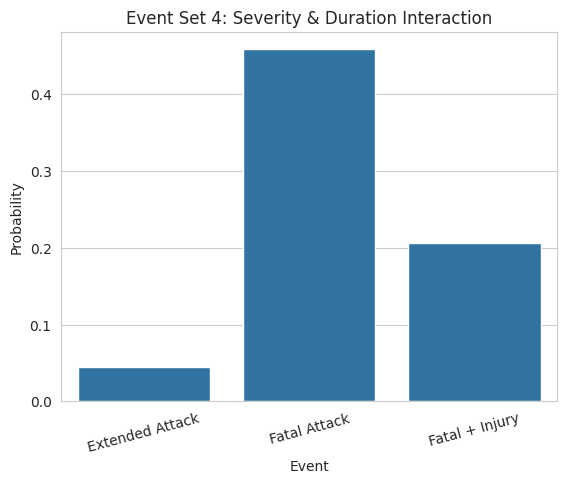

In [ ]:
df_set4 = event_probabilities(
    [A4, B4, C4],
    ["Extended Attack", "Fatal Attack", "Fatal + Injury"]
)

display(df_set4)

sns.barplot(x="Event", y="Probability", data=df_set4)
plt.title("Event Set 4: Severity & Duration Interaction")
plt.xticks(rotation=15)
plt.show()


,Event,Probability
0,Property Damage,0.514792
1,Fatal Attack,0.458080
2,Injury Attack,0.341817


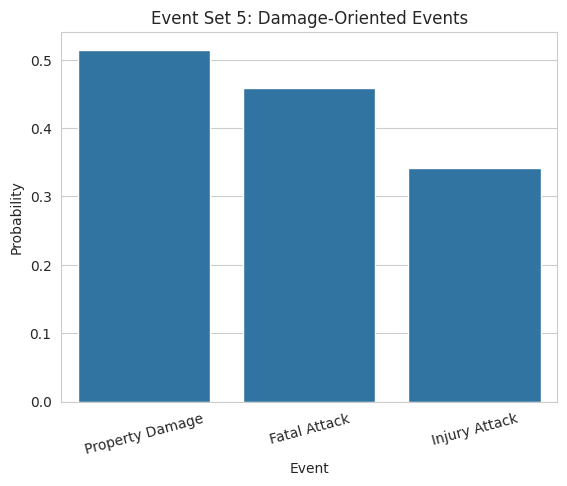

In [ ]:
df_set5 = event_probabilities(
    [A5, B5, C5],
    ["Property Damage", "Fatal Attack", "Injury Attack"]
)

display(df_set5)

sns.barplot(x="Event", y="Probability", data=df_set5)
plt.title("Event Set 5: Damage-Oriented Events")
plt.xticks(rotation=15)
plt.show()


In [ ]:
def combined_analysis(A, B):
    return {
        "P(A)": A.mean(),
        "P(B)": B.mean(),
        "P(A ∩ B)": (A & B).mean(),
        "P(A ∪ B)": A.mean() + B.mean() - (A & B).mean(),
        "P(Aᶜ)": 1 - A.mean()
    }

combined_df = pd.DataFrame([
    {"Event Set": "Set 1", **combined_analysis(A1, B1)},
    {"Event Set": "Set 2", **combined_analysis(A2, B2)},
    {"Event Set": "Set 3", **combined_analysis(A3, B3)},
    {"Event Set": "Set 4", **combined_analysis(A4, B4)},
    {"Event Set": "Set 5", **combined_analysis(A5, B5)},
])

display(combined_df)


,Event Set,P(A),P(B),P(A ∩ B),P(A ∪ B),P(Aᶜ)
0,Set 1,0.458080,0.109015,0.109015,0.458080,0.541920
1,Set 2,0.593265,0.889598,0.560881,0.921983,0.406735
2,Set 3,0.341817,0.197330,0.197330,0.341817,0.658183
3,Set 4,0.045346,0.458080,0.015141,0.488285,0.954654
4,Set 5,0.514792,0.458080,0.179882,0.792989,0.485208


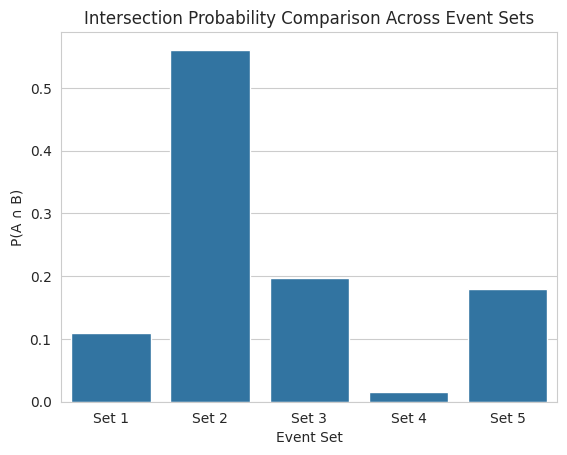

In [ ]:
sns.barplot(x="Event Set", y="P(A ∩ B)", data=combined_df)
plt.title("Intersection Probability Comparison Across Event Sets")
plt.show()


In [ ]:
df_set1.to_csv("event_set_1_probabilities.csv", index=False)
df_set2.to_csv("event_set_2_probabilities.csv", index=False)
df_set3.to_csv("event_set_3_probabilities.csv", index=False)
df_set4.to_csv("event_set_4_probabilities.csv", index=False)
df_set5.to_csv("event_set_5_probabilities.csv", index=False)
combined_df.to_csv("combined_event_probabilities.csv", index=False)

print("All probability tables exported successfully.")


All probability tables exported successfully.


In [ ]:
print("Interpretation Guide:")
print("- Each bar chart visualizes empirical probabilities from the dataset.")
print("- Higher probabilities indicate more frequently occurring event types.")
print("- Differences across event sets reflect varying risk patterns.")
print("- All results are descriptive and non-causal.")


Interpretation Guide:
- Each bar chart visualizes empirical probabilities from the dataset.
- Higher probabilities indicate more frequently occurring event types.
- Differences across event sets reflect varying risk patterns.
- All results are descriptive and non-causal.


# Column Selection Justification and Event Defining Justification

This analysis focused on understanding the empirical probabilities of various terrorism attack characteristics, drawing insights from the `globalterrorismdb_0718dist.csv` dataset. The selection of columns and definition of events were guided by the goal of revealing different aspects of attack severity, impact, and operational outcomes.

## Column Selection:

*   `nkill`: Number of fatalities. This column is central to defining events related to attack lethality.
*   `nwound`: Number of wounded. Complements `nkill` to assess human cost and injury severity.
*   `success`: A binary indicator (1 for successful, 0 for unsuccessful). Essential for evaluating the operational effectiveness of attacks.
*   `property`: Indicates whether property damage occurred (1 for yes, 0 for no, or specific damage values). Used to assess material impact.
*   `extended`: A binary indicator (1 for yes, 0 for no). Used to categorize attacks that extended beyond the initial incident, potentially indicating prolonged engagement or multiple phases.

## Event Definitions:

### Event Set 1: Fatality-Based Severity
*   **Fatal Attack (`A1`):** `df['nkill'] > 0`. Represents any attack resulting in at least one fatality. This highlights the most severe incidents.
*   **Multiple Fatalities (`B1`):** `df['nkill'] >= 5`. Focuses on attacks with a higher human cost, indicating more devastating events.
*   **No Fatalities (`C1`):** `df['nkill'] == 0`. Identifies attacks that, despite being terror incidents, did not result in deaths.

### Event Set 2: Human Impact vs Operational Outcome
*   **Any Casualty (`A2`):** `(df['nkill'].fillna(0) + df['nwound'].fillna(0)) > 0`. Combines deaths and injuries to represent any human impact. Missing values were imputed with 0 to ensure accurate summation.
*   **Successful Attack (`B2`):** `df['success'] == 1`. Directly measures the operational success rate of terrorist activities.
*   **Property Damage (`C2`):** `df['property'] > 0`. Captures incidents where there was material destruction.

### Event Set 3: Injury-Focused Events
*   **Any Injury (`A3`):** `df['nwound'] > 0`. Similar to `A1` but focusing specifically on non-fatal physical harm.
*   **High Injury (≥ Median) (`B3`):** `df['nwound'] >= median_injury`. Highlights attacks causing injuries above the median level, indicating particularly harmful events. The median was calculated only from incidents with `nwound > 0` to avoid skewing by non-injury events.
*   **No Injury (`C3`):** `df['nwound'] == 0`. Identifies incidents without any reported injuries.

### Event Set 4: Severity & Duration Interaction
*   **Extended Attack (`A4`):** `df['extended'] == 1`. Focuses on prolonged or multi-phase attacks.
*   **Fatal Attack (`B4`):** `df['nkill'] > 0`. Reused from Set 1 for comparison.
*   **Fatal + Injury (`C4`):** `(df['nkill'] > 0) & (df['nwound'] > 0)`. Represents incidents with both fatalities and injuries, indicating a high overall human impact.

### Event Set 5: Damage-Oriented Events
*   **Property Damage (`A5`):** `df['property'] > 0`. Reused from Set 2 for consistent property impact analysis.
*   **Fatal Attack (`B5`):** `df['nkill'] > 0`. Reused for comparison.
*   **Injury Attack (`C5`):** `df['nwound'] > 0`. Reused for comparison.

These definitions allow for a multi-faceted probabilistic analysis of terrorism events, covering aspects from immediate human cost to operational characteristics and property impact.


## Reflection and Summary

This section synthesizes the insights derived from the probabilistic analysis of global terrorist attack characteristics, drawing conclusions from the five event sets and their combined analysis.

### 1. Summary of Key Findings from Event Set Probabilities

#### Event Set 1: Fatality-Based Severity (`df_set1`)
-   **Fatal Attack (P(nkill > 0)): 0.458**: Approximately 45.8% of recorded terrorist attacks resulted in at least one fatality. This highlights that while a significant portion of attacks aim to cause harm, a substantial number do not result in deaths.
-   **Multiple Fatalities (P(nkill >= 5)): 0.109**: About 10.9% of attacks caused five or more fatalities, indicating that highly lethal events are a smaller, but still critical, subset of all fatal attacks.
-   **No Fatalities (P(nkill == 0)): 0.485**: Nearly half (48.5%) of attacks recorded no fatalities. This suggests a large number of attacks may involve different objectives, such as property damage, intimidation, or symbolic acts, rather than direct killing.

#### Event Set 2: Human Impact vs. Operational Outcome (`df_set2`)
-   **Any Casualty (P((nkill > 0) OR (nwound > 0))): 0.593**: Close to 60% of attacks resulted in some form of casualty (either killed or wounded). This is higher than fatal attacks alone, implying that injuries are a common outcome even when no deaths occur.
-   **Successful Attack (P(success == 1)): 0.890**: An overwhelming majority (89%) of attacks were deemed 'successful.' This high success rate suggests that terrorist groups often achieve their immediate operational objectives, irrespective of the level of casualties or damage.
-   **Property Damage (P(property > 0)): 0.515**: Over half (51.5%) of attacks involved some form of property damage, showing that destruction of property is a very common tactic, often alongside or instead of human casualties.

#### Event Set 3: Injury-Focused Events (`df_set3`)
-   **Any Injury (P(nwound > 0)): 0.342**: About 34.2% of attacks resulted in at least one injury. This is a considerable proportion, indicating that non-fatal physical harm is a significant aspect of terrorist activities.
-   **High Injury (≥ Median) (P(nwound >= 3)): 0.197**: Approximately 19.7% of attacks caused injuries equal to or greater than the median number of injuries (which was 3), indicating that a subset of attacks lead to a higher impact in terms of non-fatal casualties.
-   **No Injury (P(nwound == 0)): 0.568**: More than half (56.8%) of attacks resulted in no injuries. This reinforces the finding from Set 1 that many attacks have limited direct human physical impact.

#### Event Set 4: Severity & Duration Interaction (`df_set4`)
-   **Extended Attack (P(extended == 1)): 0.045**: Extended attacks are relatively rare, occurring in only about 4.5% of cases. Most attacks are likely quick events.
-   **Fatal Attack (P(nkill > 0)): 0.458**: (Repeated from Set 1) Consistent probability.
-   **Fatal + Injury (P((nkill > 0) AND (nwound > 0))): 0.207**: Roughly 20.7% of attacks resulted in both fatalities and injuries, indicating events with a dual impact on human life.

#### Event Set 5: Damage-Oriented Events (`df_set5`)
-   **Property Damage (P(property > 0)): 0.515**: (Repeated from Set 2) Consistent probability.
-   **Fatal Attack (P(nkill > 0)): 0.458**: (Repeated from Set 1) Consistent probability.
-   **Injury Attack (P(nwound > 0)): 0.342**: (Repeated from Set 3) Consistent probability.

### 2. Analysis of Combined Events (`combined_df`)

The `combined_df` provides insights into the relationships between pairs of events (A and B) by calculating their individual probabilities, joint probability (intersection), union probability, and the probability of the complement of A.

-   **Set 1 (Fatal Attack A1, Multiple Fatalities B1):** As expected, P(A1 ∩ B1) = P(B1) and P(A1 ∪ B1) = P(A1). This confirms that events with multiple fatalities are a proper subset of all fatal attacks. The probability of an attack having multiple fatalities given it is fatal is 10.9% / 45.8% ≈ 23.8%.

-   **Set 2 (Any Casualty A2, Successful Attack B2):**
    -   P(A2 ∩ B2) = 0.561. This means 56.1% of all attacks are both successful and cause casualties.
    -   For independence, P(A2 ∩ B2) should be approximately P(A2) * P(B2) = 0.593 * 0.890 = 0.528. Since 0.561 > 0.528, there is a positive correlation: successful attacks are *more likely* to result in casualties than if the events were independent. This is an expected finding, as causing casualties often aligns with the objectives of many terrorist attacks and contributes to their perceived success.

-   **Set 3 (Any Injury A3, High Injury B3):** Similar to Set 1, P(A3 ∩ B3) = P(B3) and P(A3 ∪ B3) = P(A3), confirming that high injury events are a subset of all injury events.

-   **Set 4 (Extended Attack A4, Fatal Attack B4):**
    -   P(A4 ∩ B4) = 0.015. Only 1.5% of attacks are both extended and fatal.
    -   P(A4) * P(B4) = 0.045 * 0.458 = 0.021. Since 0.015 < 0.021, there's a slight negative correlation or weaker-than-expected relationship: extended attacks are *less likely* to be fatal than if they were independent. This could imply that attacks designed for prolonged engagement (e.g., sieges, kidnappings over time) might prioritize other outcomes (like political leverage or prolonged media attention) over immediate high fatality counts, or that fatalities often occur rapidly regardless of duration.

-   **Set 5 (Property Damage A5, Fatal Attack B5):**
    -   P(A5 ∩ B5) = 0.180. 18.0% of attacks involve both property damage and fatalities.
    -   P(A5) * P(B5) = 0.515 * 0.458 = 0.236. Since 0.180 < 0.236, there's a negative correlation: attacks involving property damage are *less likely* to be fatal than if the events were independent. This suggests a distinction between attacks primarily aimed at causing physical destruction (property) and those primarily targeting human life. Attacks focused on infrastructure or symbolic targets might have lower immediate fatality counts, even if they cause significant economic disruption.

### 3. Cross-Set Comparison and Trends

-   **Fatal Attacks**: The probability of a `Fatal Attack` (P(nkill > 0)) consistently appears around 45.8% across Set 1, Set 4, and Set 5, establishing it as a moderately frequent outcome. However, `Any Casualty` (P((nkill > 0) OR (nwound > 0))) is significantly higher at 59.3% (Set 2), indicating that injuries are a more pervasive outcome than fatalities alone.
-   **Non-Fatal Outcomes**: `No Fatalities` (48.5%) and `No Injury` (56.8%) are both very common, suggesting that a large proportion of attacks do not result in direct physical harm to individuals. This highlights the varied nature of terrorist objectives.
-   **Operational Success vs. Impact**: The extremely high probability of a `Successful Attack` (89.0%) stands in contrast to the lower probabilities of `Fatal Attack` (45.8%) or `Any Casualty` (59.3%). This implies that 'success' for terrorist organizations is often defined by criteria other than or in addition to high casualty counts, such as achieving propaganda, demonstrating capability, or disrupting infrastructure.
-   **Property Damage**: `Property Damage` (51.5%) is a very common feature, almost as prevalent as `Any Casualty` and even more likely than `Fatal Attack`. This suggests that economic disruption and destruction of physical assets are primary or secondary goals in many attacks.

### 4. Reflection and Overall Implications

-   **Expected Results**: The high probability of `Successful Attack` was somewhat expected, as terrorist groups likely choose targets and methods to maximize their chances of achieving immediate tactical goals. The fact that `Any Casualty` is higher than `Fatal Attack` is also intuitive, as injuries are a broader category of harm.
-   **Surprising Results**: The negative correlation between `Extended Attack` and `Fatal Attack`, and between `Property Damage` and `Fatal Attack` is noteworthy. This suggests that the categories of attacks are not always aligned in a simple linear way. Attacks designed for prolonged engagement or extensive property destruction might employ different tactics or have different primary objectives than those maximizing immediate fatalities. For example, a car bomb targeting a building for property damage might have fewer direct fatalities than a targeted assassination or a mass shooting, even if the property damage is extensive.
-   **Overall Implications**: The analysis reveals that global terrorism is not monolithic. There's a significant portion of attacks focused on property destruction or symbolic acts without direct human harm. While lethal attacks are a serious concern, they represent less than half of all incidents. Understanding these distinct probabilistic profiles can help policymakers and security analysts tailor counter-terrorism strategies, distinguishing between threats aiming for mass casualties versus those prioritizing disruption, intimidation, or property destruction. The high 'success' rate also warrants deeper investigation into how terrorist groups define and achieve their objectives.

### 5. Conclusion

This probabilistic analysis of global terrorism data provides a quantitative foundation for understanding the characteristics and patterns of attacks. We observed that nearly half of all attacks result in fatalities, but a higher proportion cause some form of human casualty (killed or wounded). Property damage is also a highly prevalent outcome, sometimes occurring independently of high human casualty counts. The analysis of combined events indicates a strong positive correlation between successful attacks and casualties, but also reveals a more nuanced relationship between attack duration, property damage, and fatalities. Specifically, extended attacks and attacks with property damage appear to be *less* associated with fatalities than would be expected if these events were independent. These findings underscore the diverse nature of terrorist operations and highlight the need for multifaceted approaches to counter-terrorism efforts, considering not just lethal threats but also those focused on property, intimidation, and prolonged engagement.